In [147]:
import pandas as pd

In [148]:
from matplotlib import pyplot as plt

In [149]:
import numpy as np

In [150]:
import math

In [151]:
import seaborn as sns

In [152]:
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [153]:
data = pd.read_csv('populationbysex.csv')

C:\Users\Sanchy PC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [154]:
data

,LocID,location,VarID,Variant,year,MidPeriod,male,female,total,density
0,4,Afghanistan,2.0,Medium,1950.0,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2.0,Medium,1951.0,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2.0,Medium,1952.0,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2.0,Medium,1953.0,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2.0,Medium,1954.0,1954.5,4266.484,3884.832,8151.316,12.486
...,...,...,...,...,...,...,...,...,...,...
280927,716,Zimbabwe,207.0,Lower 95 PI,2080.0,2080.5,10576.533,11255.983,21836.893,56.448
280928,716,Zimbabwe,207.0,Lower 95 PI,2085.0,2085.5,10293.349,11050.875,21355.988,55.205
280929,716,Zimbabwe,207.0,Lower 95 PI,2090.0,2090.5,9920.336,10767.709,20689.956,53.483
280930,716,Zimbabwe,207.0,Lower 95 PI,2095.0,2095.5,9503.711,10412.184,19892.080,51.421


In [155]:
data.head()

,LocID,location,VarID,Variant,year,MidPeriod,male,female,total,density
0,4,Afghanistan,2.0,Medium,1950.0,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2.0,Medium,1951.0,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2.0,Medium,1952.0,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2.0,Medium,1953.0,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2.0,Medium,1954.0,1954.5,4266.484,3884.832,8151.316,12.486


In [156]:
data2010 = data[(data.year > 2009) & (data.year < 2020)]

In [157]:
data2010

,LocID,location,VarID,Variant,year,MidPeriod,male,female,total,density
60,4,Afghanistan,2.0,Medium,2010.0,2010.5,14935.756,14249.755,29185.511,44.704
61,4,Afghanistan,2.0,Medium,2011.0,2011.5,15415.361,14702.050,30117.411,46.131
62,4,Afghanistan,2.0,Medium,2012.0,2012.5,15964.874,15196.504,31161.378,47.731
63,4,Afghanistan,2.0,Medium,2013.0,2013.5,16554.278,15715.314,32269.592,49.428
64,4,Afghanistan,2.0,Medium,2014.0,2014.5,17138.803,16232.001,33370.804,51.115
...,...,...,...,...,...,...,...,...,...,...
280113,716,Zimbabwe,2.0,Medium,2015.0,2015.5,6568.778,7245.864,13814.642,35.711
280114,716,Zimbabwe,2.0,Medium,2016.0,2016.5,6674.206,7356.132,14030.338,36.268
280115,716,Zimbabwe,2.0,Medium,2017.0,2017.5,6777.054,7459.545,14236.599,36.801
280116,716,Zimbabwe,2.0,Medium,2018.0,2018.5,6879.119,7559.693,14438.812,37.324


In [158]:
data2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4680 entries, 60 to 280117
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LocID      4680 non-null   object 
 1   location   4680 non-null   object 
 2   VarID      4680 non-null   float64
 3   Variant    4680 non-null   object 
 4   year       4680 non-null   float64
 5   MidPeriod  4680 non-null   float64
 6   male       4350 non-null   float64
 7   female     4350 non-null   float64
 8   total      4680 non-null   float64
 9   density    4680 non-null   float64
dtypes: float64(7), object(3)
memory usage: 402.2+ KB


In [159]:
data2010.shape

(4680, 10)

In [160]:
type(data2010)

pandas.core.frame.DataFrame

In [161]:
data2010.isnull().sum()

LocID          0
location       0
VarID          0
Variant        0
year           0
MidPeriod      0
male         330
female       330
total          0
density        0
dtype: int64

In [162]:
data.dropna(axis=1)

,LocID
0,4
1,4
2,4
3,4
4,4
...,...
280927,716
280928,716
280929,716
280930,716


In [163]:
data.dropna(how='any')

,LocID,location,VarID,Variant,year,MidPeriod,male,female,total,density
0,4,Afghanistan,2.0,Medium,1950.0,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2.0,Medium,1951.0,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2.0,Medium,1952.0,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2.0,Medium,1953.0,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2.0,Medium,1954.0,1954.5,4266.484,3884.832,8151.316,12.486
...,...,...,...,...,...,...,...,...,...,...
280927,716,Zimbabwe,207.0,Lower 95 PI,2080.0,2080.5,10576.533,11255.983,21836.893,56.448
280928,716,Zimbabwe,207.0,Lower 95 PI,2085.0,2085.5,10293.349,11050.875,21355.988,55.205
280929,716,Zimbabwe,207.0,Lower 95 PI,2090.0,2090.5,9920.336,10767.709,20689.956,53.483
280930,716,Zimbabwe,207.0,Lower 95 PI,2095.0,2095.5,9503.711,10412.184,19892.080,51.421


In [164]:
data2010['male'].fillna(0, inplace=True)
data2010['female'].fillna(0, inplace=True)

C:\Users\Sanchy PC\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [165]:
data2010.isnull().sum()

LocID        0
location     0
VarID        0
Variant      0
year         0
MidPeriod    0
male         0
female       0
total        0
density      0
dtype: int64

In [166]:
data.values

array([['4', 'Afghanistan', 2.0, ..., 3652.8740000000003,
        7752.116999999999, 11.874],
       ['4', 'Afghanistan', 2.0, ..., 3705.395, 7840.151, 12.009],
       ['4', 'Afghanistan', 2.0, ..., 3761.546, 7935.996,
        12.155999999999999],
       ...,
       [716, 'Zimbabwe', 207.0, ..., 10767.708999999999,
        20689.956000000002, 53.483000000000004],
       [716, 'Zimbabwe', 207.0, ..., 10412.184000000001, 19892.08,
        51.42100000000001],
       [716, 'Zimbabwe', 207.0, ..., 9996.105, 19061.177, 49.273]],
      dtype=object)

In [167]:
data.drop(['LocID','VarID'],axis=1)

,location,Variant,year,MidPeriod,male,female,total,density
0,Afghanistan,Medium,1950.0,1950.5,4099.243,3652.874,7752.117,11.874
1,Afghanistan,Medium,1951.0,1951.5,4134.756,3705.395,7840.151,12.009
2,Afghanistan,Medium,1952.0,1952.5,4174.450,3761.546,7935.996,12.156
3,Afghanistan,Medium,1953.0,1953.5,4218.336,3821.348,8039.684,12.315
4,Afghanistan,Medium,1954.0,1954.5,4266.484,3884.832,8151.316,12.486
...,...,...,...,...,...,...,...,...
280927,Zimbabwe,Lower 95 PI,2080.0,2080.5,10576.533,11255.983,21836.893,56.448
280928,Zimbabwe,Lower 95 PI,2085.0,2085.5,10293.349,11050.875,21355.988,55.205
280929,Zimbabwe,Lower 95 PI,2090.0,2090.5,9920.336,10767.709,20689.956,53.483
280930,Zimbabwe,Lower 95 PI,2095.0,2095.5,9503.711,10412.184,19892.080,51.421


In [168]:
macedonia = data2010[data2010.location == 'North Macedonia']

In [169]:
macedonia

,LocID,location,VarID,Variant,year,MidPeriod,male,female,total,density
181893,807,North Macedonia,2.0,Medium,2010.0,2010.5,1034.925,1035.812,2070.737,82.107
181894,807,North Macedonia,2.0,Medium,2011.0,2011.5,1036.009,1036.475,2072.484,82.176
181895,807,North Macedonia,2.0,Medium,2012.0,2012.5,1037.176,1037.099,2074.275,82.247
181896,807,North Macedonia,2.0,Medium,2013.0,2013.5,1038.356,1037.709,2076.065,82.318
181897,807,North Macedonia,2.0,Medium,2014.0,2014.5,1039.453,1038.327,2077.780,82.386
181898,807,North Macedonia,2.0,Medium,2015.0,2015.5,1040.400,1038.935,2079.335,82.448
181899,807,North Macedonia,2.0,Medium,2016.0,2016.5,1041.178,1039.568,2080.746,82.504
181900,807,North Macedonia,2.0,Medium,2017.0,2017.5,1041.785,1040.211,2081.996,82.553
181901,807,North Macedonia,2.0,Medium,2018.0,2018.5,1042.177,1040.780,2082.957,82.591
181902,807,North Macedonia,2.0,Medium,2019.0,2019.5,1042.305,1041.153,2083.458,82.611


In [170]:
macedonia.shape


(10, 10)

In [171]:
macedonia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 181893 to 181902
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LocID      10 non-null     object 
 1   location   10 non-null     object 
 2   VarID      10 non-null     float64
 3   Variant    10 non-null     object 
 4   year       10 non-null     float64
 5   MidPeriod  10 non-null     float64
 6   male       10 non-null     float64
 7   female     10 non-null     float64
 8   total      10 non-null     float64
 9   density    10 non-null     float64
dtypes: float64(7), object(3)
memory usage: 880.0+ bytes


In [172]:
macedonia.columns

Index(['LocID', 'location', 'VarID', 'Variant', 'year', 'MidPeriod', 'male',
       'female', 'total', 'density'],
      dtype='object')

In [173]:
macedonia.isnull().sum()

LocID        0
location     0
VarID        0
Variant      0
year         0
MidPeriod    0
male         0
female       0
total        0
density      0
dtype: int64

In [174]:
type(macedonia)

pandas.core.frame.DataFrame

In [175]:
macedonia2020 = macedonia.loc[macedonia['year'] == 2019, ['location','year','male', 'female', 'total', 'density']]

In [176]:
macedonia2020

,location,year,male,female,total,density
181902,North Macedonia,2019.0,1042.305,1041.153,2083.458,82.611


In [177]:
macedonia2020.duplicated().sum()

0

In [178]:
macedonia.fillna(0)

,LocID,location,VarID,Variant,year,MidPeriod,male,female,total,density
181893,807,North Macedonia,2.0,Medium,2010.0,2010.5,1034.925,1035.812,2070.737,82.107
181894,807,North Macedonia,2.0,Medium,2011.0,2011.5,1036.009,1036.475,2072.484,82.176
181895,807,North Macedonia,2.0,Medium,2012.0,2012.5,1037.176,1037.099,2074.275,82.247
181896,807,North Macedonia,2.0,Medium,2013.0,2013.5,1038.356,1037.709,2076.065,82.318
181897,807,North Macedonia,2.0,Medium,2014.0,2014.5,1039.453,1038.327,2077.780,82.386
181898,807,North Macedonia,2.0,Medium,2015.0,2015.5,1040.400,1038.935,2079.335,82.448
181899,807,North Macedonia,2.0,Medium,2016.0,2016.5,1041.178,1039.568,2080.746,82.504
181900,807,North Macedonia,2.0,Medium,2017.0,2017.5,1041.785,1040.211,2081.996,82.553
181901,807,North Macedonia,2.0,Medium,2018.0,2018.5,1042.177,1040.780,2082.957,82.591
181902,807,North Macedonia,2.0,Medium,2019.0,2019.5,1042.305,1041.153,2083.458,82.611


In [179]:
data2010

,LocID,location,VarID,Variant,year,MidPeriod,male,female,total,density
60,4,Afghanistan,2.0,Medium,2010.0,2010.5,14935.756,14249.755,29185.511,44.704
61,4,Afghanistan,2.0,Medium,2011.0,2011.5,15415.361,14702.050,30117.411,46.131
62,4,Afghanistan,2.0,Medium,2012.0,2012.5,15964.874,15196.504,31161.378,47.731
63,4,Afghanistan,2.0,Medium,2013.0,2013.5,16554.278,15715.314,32269.592,49.428
64,4,Afghanistan,2.0,Medium,2014.0,2014.5,17138.803,16232.001,33370.804,51.115
...,...,...,...,...,...,...,...,...,...,...
280113,716,Zimbabwe,2.0,Medium,2015.0,2015.5,6568.778,7245.864,13814.642,35.711
280114,716,Zimbabwe,2.0,Medium,2016.0,2016.5,6674.206,7356.132,14030.338,36.268
280115,716,Zimbabwe,2.0,Medium,2017.0,2017.5,6777.054,7459.545,14236.599,36.801
280116,716,Zimbabwe,2.0,Medium,2018.0,2018.5,6879.119,7559.693,14438.812,37.324


In [180]:
data2010

,LocID,location,VarID,Variant,year,MidPeriod,male,female,total,density
60,4,Afghanistan,2.0,Medium,2010.0,2010.5,14935.756,14249.755,29185.511,44.704
61,4,Afghanistan,2.0,Medium,2011.0,2011.5,15415.361,14702.050,30117.411,46.131
62,4,Afghanistan,2.0,Medium,2012.0,2012.5,15964.874,15196.504,31161.378,47.731
63,4,Afghanistan,2.0,Medium,2013.0,2013.5,16554.278,15715.314,32269.592,49.428
64,4,Afghanistan,2.0,Medium,2014.0,2014.5,17138.803,16232.001,33370.804,51.115
...,...,...,...,...,...,...,...,...,...,...
280113,716,Zimbabwe,2.0,Medium,2015.0,2015.5,6568.778,7245.864,13814.642,35.711
280114,716,Zimbabwe,2.0,Medium,2016.0,2016.5,6674.206,7356.132,14030.338,36.268
280115,716,Zimbabwe,2.0,Medium,2017.0,2017.5,6777.054,7459.545,14236.599,36.801
280116,716,Zimbabwe,2.0,Medium,2018.0,2018.5,6879.119,7559.693,14438.812,37.324


In [181]:
data2010.isnull().sum()

LocID        0
location     0
VarID        0
Variant      0
year         0
MidPeriod    0
male         0
female       0
total        0
density      0
dtype: int64

In [182]:
data2010

,LocID,location,VarID,Variant,year,MidPeriod,male,female,total,density
60,4,Afghanistan,2.0,Medium,2010.0,2010.5,14935.756,14249.755,29185.511,44.704
61,4,Afghanistan,2.0,Medium,2011.0,2011.5,15415.361,14702.050,30117.411,46.131
62,4,Afghanistan,2.0,Medium,2012.0,2012.5,15964.874,15196.504,31161.378,47.731
63,4,Afghanistan,2.0,Medium,2013.0,2013.5,16554.278,15715.314,32269.592,49.428
64,4,Afghanistan,2.0,Medium,2014.0,2014.5,17138.803,16232.001,33370.804,51.115
...,...,...,...,...,...,...,...,...,...,...
280113,716,Zimbabwe,2.0,Medium,2015.0,2015.5,6568.778,7245.864,13814.642,35.711
280114,716,Zimbabwe,2.0,Medium,2016.0,2016.5,6674.206,7356.132,14030.338,36.268
280115,716,Zimbabwe,2.0,Medium,2017.0,2017.5,6777.054,7459.545,14236.599,36.801
280116,716,Zimbabwe,2.0,Medium,2018.0,2018.5,6879.119,7559.693,14438.812,37.324


In [183]:
data2019 = data2010[data2010.year == 2019]

In [184]:
data2019

,LocID,location,VarID,Variant,year,MidPeriod,male,female,total,density
69,4,Afghanistan,2.0,Medium,2019.0,2019.5,19529.727,18512.030,38041.757,58.269
953,903,Africa,2.0,Medium,2019.0,2019.5,653513.680,654550.496,1308064.176,44.119
1837,1823,African Group,2.0,Medium,2019.0,2019.5,652644.714,653675.858,1306320.572,44.464
1988,1560,African Union,2.0,Medium,2019.0,2019.5,652949.469,653953.561,1306903.030,44.085
2139,2080,African Union: Central Africa,2.0,Medium,2019.0,2019.5,76945.498,77068.207,154013.705,29.192
...,...,...,...,...,...,...,...,...,...,...
277314,900,World,2.0,Medium,2019.0,2019.5,3889034.611,3824433.594,7713468.205,59.291
278198,1801,World Bank Regional Groups (developing only),2.0,Medium,2019.0,2019.5,3261387.881,3191129.174,6452517.055,70.258
278349,887,Yemen,2.0,Medium,2019.0,2019.5,14692.284,14469.638,29161.922,55.234
279233,894,Zambia,2.0,Medium,2019.0,2019.5,8843.214,9017.820,17861.034,24.026


In [185]:
china = data2010[data2010['location'] == 'China']
china

,LocID,location,VarID,Variant,year,MidPeriod,male,female,total,density
47884,156,China,2.0,Medium,2010.0,2010.5,703414.019,665396.585,1368810.604,145.801
47885,156,China,2.0,Medium,2011.0,2011.5,707339.988,669157.645,1376497.633,146.620
47886,156,China,2.0,Medium,2012.0,2012.5,711236.631,672969.777,1384206.408,147.441
47887,156,China,2.0,Medium,2013.0,2013.5,715082.615,676800.720,1391883.335,148.259
47888,156,China,2.0,Medium,2014.0,2014.5,718849.365,680604.601,1399453.966,149.065
47889,156,China,2.0,Medium,2015.0,2015.5,722508.006,684339.862,1406847.868,149.853
47890,156,China,2.0,Medium,2016.0,2016.5,726052.413,687996.940,1414049.353,150.620
47891,156,China,2.0,Medium,2017.0,2017.5,729462.380,691559.414,1421021.794,151.362
47892,156,China,2.0,Medium,2018.0,2018.5,732677.783,694970.006,1427647.789,152.068
47893,156,China,2.0,Medium,2019.0,2019.5,735624.259,698159.433,1433783.692,152.722


In [186]:
macedonia = data2010[data2010['location'] == 'North Macedonia']
macedonia

,LocID,location,VarID,Variant,year,MidPeriod,male,female,total,density
181893,807,North Macedonia,2.0,Medium,2010.0,2010.5,1034.925,1035.812,2070.737,82.107
181894,807,North Macedonia,2.0,Medium,2011.0,2011.5,1036.009,1036.475,2072.484,82.176
181895,807,North Macedonia,2.0,Medium,2012.0,2012.5,1037.176,1037.099,2074.275,82.247
181896,807,North Macedonia,2.0,Medium,2013.0,2013.5,1038.356,1037.709,2076.065,82.318
181897,807,North Macedonia,2.0,Medium,2014.0,2014.5,1039.453,1038.327,2077.780,82.386
181898,807,North Macedonia,2.0,Medium,2015.0,2015.5,1040.400,1038.935,2079.335,82.448
181899,807,North Macedonia,2.0,Medium,2016.0,2016.5,1041.178,1039.568,2080.746,82.504
181900,807,North Macedonia,2.0,Medium,2017.0,2017.5,1041.785,1040.211,2081.996,82.553
181901,807,North Macedonia,2.0,Medium,2018.0,2018.5,1042.177,1040.780,2082.957,82.591
181902,807,North Macedonia,2.0,Medium,2019.0,2019.5,1042.305,1041.153,2083.458,82.611


In [187]:
data2010.iloc[345:543]

,LocID,location,VarID,Variant,year,MidPeriod,male,female,total,density
20743,112,Belarus,2.0,Medium,2015.0,2015.5,4392.411,5047.013,9439.424,46.520
20744,112,Belarus,2.0,Medium,2016.0,2016.5,4395.949,5049.689,9445.638,46.551
20745,112,Belarus,2.0,Medium,2017.0,2017.5,4398.367,5051.866,9450.233,46.574
20746,112,Belarus,2.0,Medium,2018.0,2018.5,4399.620,5052.995,9452.615,46.585
20747,112,Belarus,2.0,Medium,2019.0,2019.5,4399.913,5052.496,9452.409,46.584
...,...,...,...,...,...,...,...,...,...,...
32562,96,Brunei Darussalam,2.0,Medium,2018.0,2018.5,222.904,206.056,428.960,81.397
32563,96,Brunei Darussalam,2.0,Medium,2019.0,2019.5,224.982,208.314,433.296,82.219
33438,100,Bulgaria,2.0,Medium,2010.0,2010.5,3615.632,3809.379,7425.011,68.395
33439,100,Bulgaria,2.0,Medium,2011.0,2011.5,3592.795,3785.857,7378.652,67.968


In [188]:
data2010

,LocID,location,VarID,Variant,year,MidPeriod,male,female,total,density
60,4,Afghanistan,2.0,Medium,2010.0,2010.5,14935.756,14249.755,29185.511,44.704
61,4,Afghanistan,2.0,Medium,2011.0,2011.5,15415.361,14702.050,30117.411,46.131
62,4,Afghanistan,2.0,Medium,2012.0,2012.5,15964.874,15196.504,31161.378,47.731
63,4,Afghanistan,2.0,Medium,2013.0,2013.5,16554.278,15715.314,32269.592,49.428
64,4,Afghanistan,2.0,Medium,2014.0,2014.5,17138.803,16232.001,33370.804,51.115
...,...,...,...,...,...,...,...,...,...,...
280113,716,Zimbabwe,2.0,Medium,2015.0,2015.5,6568.778,7245.864,13814.642,35.711
280114,716,Zimbabwe,2.0,Medium,2016.0,2016.5,6674.206,7356.132,14030.338,36.268
280115,716,Zimbabwe,2.0,Medium,2017.0,2017.5,6777.054,7459.545,14236.599,36.801
280116,716,Zimbabwe,2.0,Medium,2018.0,2018.5,6879.119,7559.693,14438.812,37.324


In [189]:
macedonia["female"].mean()

1038.6069000000002

In [190]:
data2010[(data2010 != '0').all(1)]

C:\Users\Sanchy PC\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,LocID,location,VarID,Variant,year,MidPeriod,male,female,total,density
60,4,Afghanistan,2.0,Medium,2010.0,2010.5,14935.756,14249.755,29185.511,44.704
61,4,Afghanistan,2.0,Medium,2011.0,2011.5,15415.361,14702.050,30117.411,46.131
62,4,Afghanistan,2.0,Medium,2012.0,2012.5,15964.874,15196.504,31161.378,47.731
63,4,Afghanistan,2.0,Medium,2013.0,2013.5,16554.278,15715.314,32269.592,49.428
64,4,Afghanistan,2.0,Medium,2014.0,2014.5,17138.803,16232.001,33370.804,51.115
...,...,...,...,...,...,...,...,...,...,...
280113,716,Zimbabwe,2.0,Medium,2015.0,2015.5,6568.778,7245.864,13814.642,35.711
280114,716,Zimbabwe,2.0,Medium,2016.0,2016.5,6674.206,7356.132,14030.338,36.268
280115,716,Zimbabwe,2.0,Medium,2017.0,2017.5,6777.054,7459.545,14236.599,36.801
280116,716,Zimbabwe,2.0,Medium,2018.0,2018.5,6879.119,7559.693,14438.812,37.324


In [191]:
macedonia

,LocID,location,VarID,Variant,year,MidPeriod,male,female,total,density
181893,807,North Macedonia,2.0,Medium,2010.0,2010.5,1034.925,1035.812,2070.737,82.107
181894,807,North Macedonia,2.0,Medium,2011.0,2011.5,1036.009,1036.475,2072.484,82.176
181895,807,North Macedonia,2.0,Medium,2012.0,2012.5,1037.176,1037.099,2074.275,82.247
181896,807,North Macedonia,2.0,Medium,2013.0,2013.5,1038.356,1037.709,2076.065,82.318
181897,807,North Macedonia,2.0,Medium,2014.0,2014.5,1039.453,1038.327,2077.780,82.386
181898,807,North Macedonia,2.0,Medium,2015.0,2015.5,1040.400,1038.935,2079.335,82.448
181899,807,North Macedonia,2.0,Medium,2016.0,2016.5,1041.178,1039.568,2080.746,82.504
181900,807,North Macedonia,2.0,Medium,2017.0,2017.5,1041.785,1040.211,2081.996,82.553
181901,807,North Macedonia,2.0,Medium,2018.0,2018.5,1042.177,1040.780,2082.957,82.591
181902,807,North Macedonia,2.0,Medium,2019.0,2019.5,1042.305,1041.153,2083.458,82.611


In [192]:
macedonia['female'].mean()

1038.6069000000002

In [193]:
data2010.describe()

,VarID,year,MidPeriod,male,female,total,density
count,4680.0,4680.000000,4680.000000,4.680000e+03,4.680000e+03,4.680000e+03,4680.000000
mean,2.0,2014.500000,2015.000000,3.020003e+05,2.960101e+05,5.980127e+05,204.866793
std,0.0,2.872588,2.872588,6.544854e+05,6.358175e+05,1.290225e+06,1234.833867
min,2.0,2010.000000,2010.500000,0.000000e+00,0.000000e+00,7.830000e-01,0.137000
25%,2.0,2012.000000,2012.500000,2.296832e+03,2.284678e+03,4.584434e+03,28.013000
50%,2.0,2014.500000,2015.000000,2.320080e+04,2.354008e+04,4.693078e+04,58.441000
75%,2.0,2017.000000,2017.500000,2.562760e+05,2.601160e+05,5.135577e+05,139.508000
max,2.0,2019.000000,2019.500000,3.889035e+06,3.824434e+06,7.713468e+06,26152.349000


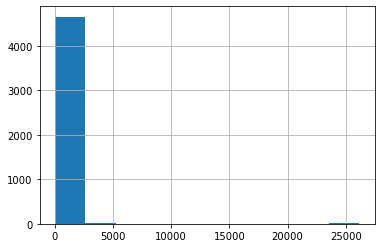

In [194]:
data2010.density.hist()

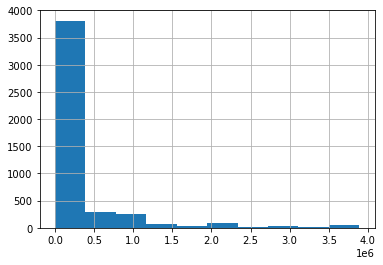

In [195]:
data2010.male.hist()

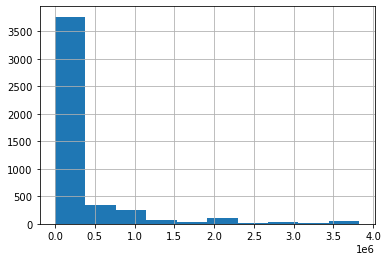

In [196]:
data2010.female.hist()

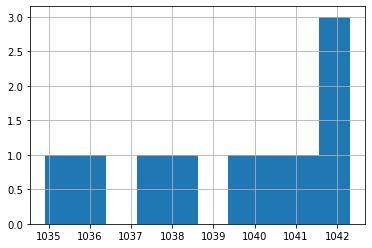

In [197]:
macedonia.male.hist()

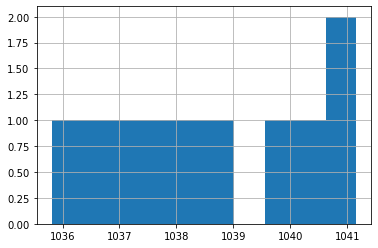

In [198]:
macedonia.female.hist()

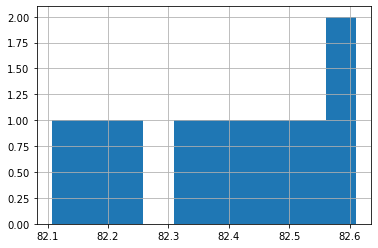

In [199]:
macedonia.density.hist()

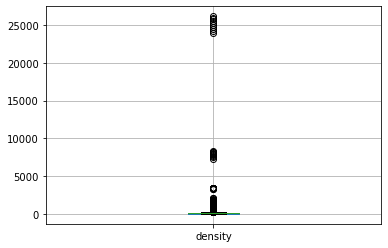

In [200]:
data2010.boxplot(column=['density'])

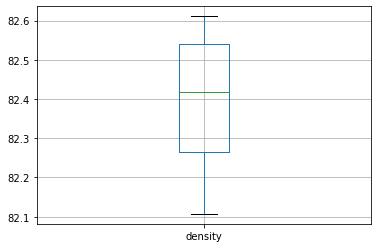

In [201]:
macedonia.boxplot(column=['density'])

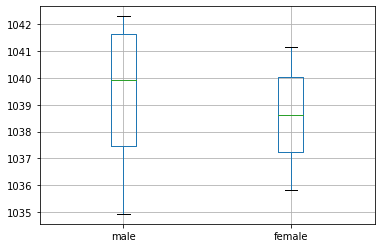

In [202]:
macedonia.boxplot(column=['male', 'female'])

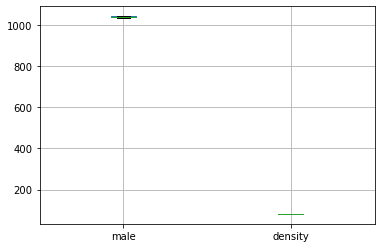

In [203]:
macedonia.boxplot(column=['male', 'density'])

In [204]:
data2010[['male', 'female', 'density']].corr()

,male,female,density
male,1.000000,0.999761,-0.039061
female,0.999761,1.000000,-0.040067
density,-0.039061,-0.040067,1.000000


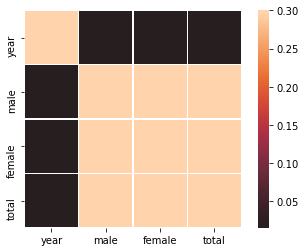

In [205]:
sns.heatmap(data2010[['year','male','female','total']].corr(),vmax=.3,center=0,square=True,linewidths=.5)

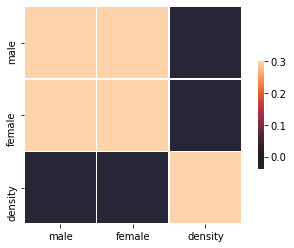

In [206]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(data2010[['male','female','density']].corr(),vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink": .5})

In [207]:
# data2010_cat = data2010[['location','year','male','female','total','density']]

# for i in data2010_cat.columns:
#     cat_num = data2010_cat[i].value_counts()
#     print("graph for %s: total = %d" % (i, len(cat_num)))
#     chart = sns.barplot(x=cat_num.index, y=cat_num)
#     chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
#     plt.show()

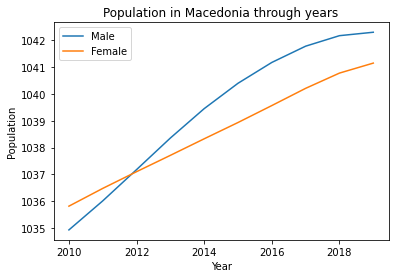

In [208]:
plt.plot(macedonia.year, macedonia.male)
plt.plot(macedonia.year,macedonia.female)
plt.legend(['Male', 'Female'])
plt.title('Population in Macedonia through years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

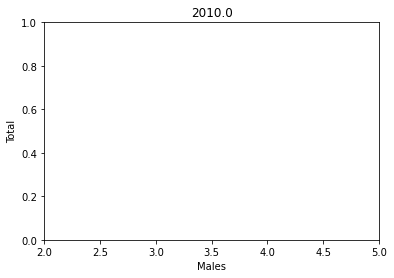

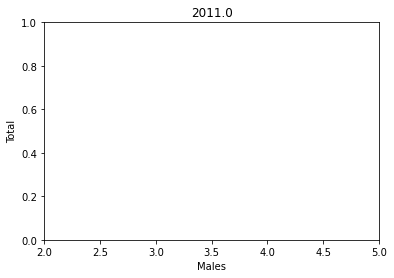

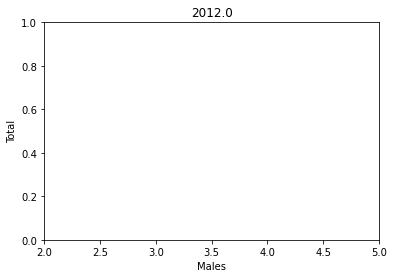

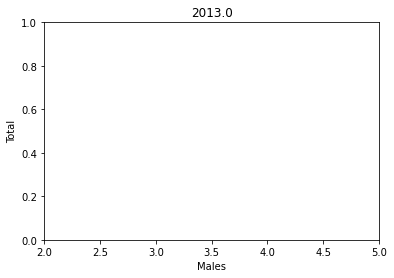

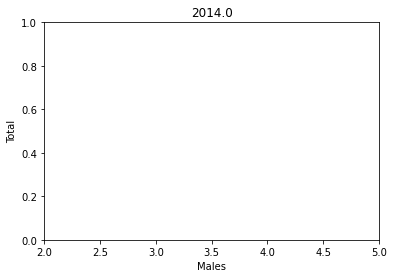

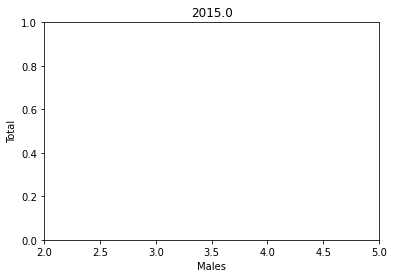

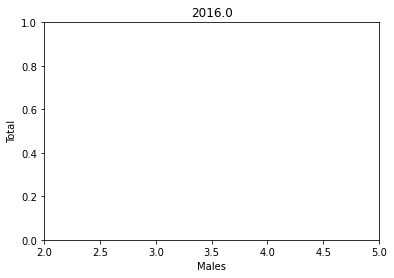

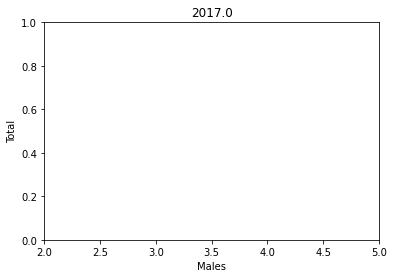

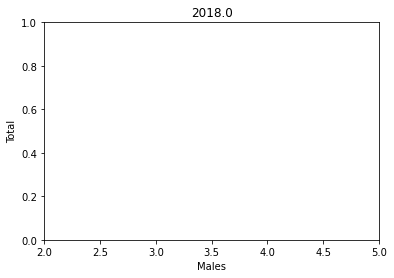

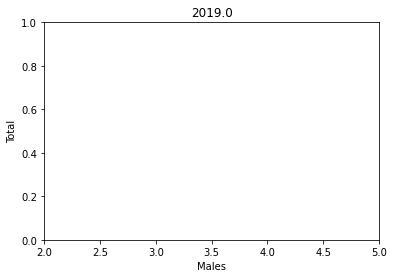

In [209]:
years_sorted = sorted(set(data2010.year))
for given_year in years_sorted:
    data_year = data2010[data2010.year  == given_year]
    plt.scatter = (data_year.male, data_year.total, 6)
    plt.xlabel('Males')
    plt.ylabel('Total')
    plt.xlim(2,5)
    plt.title(given_year)
    plt.show()

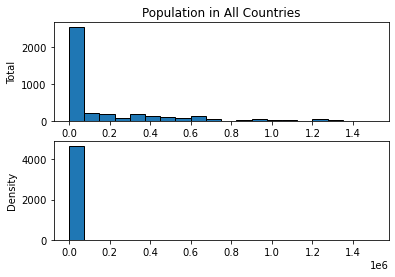

In [210]:
plt.subplot(2,1,1)
plt.hist(data2010.total,20,range=(0,1500000), edgecolor = 'black')
plt.title('Population in All Countries')
plt.ylabel('Total')
plt.subplot(2,1,2)
plt.hist(data2010.density,20,range=(0,1500000), edgecolor = 'black')
plt.ylabel('Density')
plt.show()

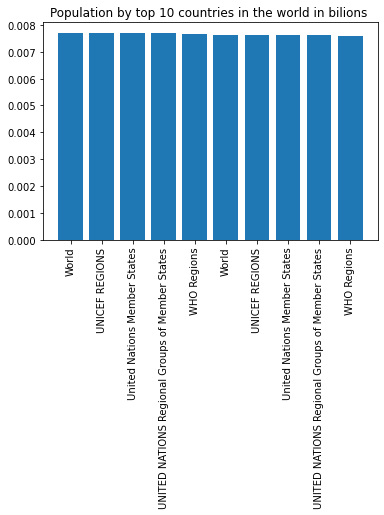

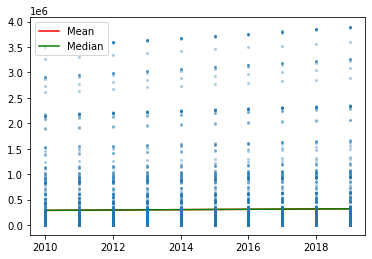

In [211]:
top10 = data2010.sort_values('total', ascending=False).head(10)
x = range(10)
plt.bar(x,top10.total / 10**9)
plt.title('Population by top 10 countries in the world in bilions ')
plt.xticks(x,top10.location, rotation='vertical')
plt.show()

data_mean = data2010.groupby('year').mean()
data_median = data2010.groupby('year').median()
plt.plot(data_mean.index,data_mean.male, 'red')
plt.plot(data_median.index,data_mean.male, 'green')
plt.legend(['Mean', 'Median'])
plt.plot(data2010.year,data2010.male, 'o',markersize=2,alpha=0.3)
plt.show()

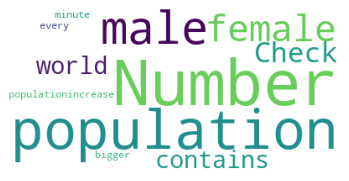

In [212]:
text = "Check out the number of population, population that contains male and female." \
       "Population in the world. Number of population" \
       "increase every minute. Number of female is bigger than male" 

cloud  = WordCloud(background_color="white").generate(text)

plt.imshow(cloud)
plt.axis('off')
plt.show()

In [213]:
#choose relevant columns - 
data2010_model = data2010[['location', 'year', 'male','female','total','density']]

In [214]:
data2010_model

,location,year,male,female,total,density
60,Afghanistan,2010.0,14935.756,14249.755,29185.511,44.704
61,Afghanistan,2011.0,15415.361,14702.050,30117.411,46.131
62,Afghanistan,2012.0,15964.874,15196.504,31161.378,47.731
63,Afghanistan,2013.0,16554.278,15715.314,32269.592,49.428
64,Afghanistan,2014.0,17138.803,16232.001,33370.804,51.115
...,...,...,...,...,...,...
280113,Zimbabwe,2015.0,6568.778,7245.864,13814.642,35.711
280114,Zimbabwe,2016.0,6674.206,7356.132,14030.338,36.268
280115,Zimbabwe,2017.0,6777.054,7459.545,14236.599,36.801
280116,Zimbabwe,2018.0,6879.119,7559.693,14438.812,37.324


In [215]:
#get dummy data- za gradenje na modelite,imame kategoricni podatoci, za sekoj tip na varijabla ni treba specificna 
#kolona,pa pravime kolona za skoja od niv,

data2010_dum = pd.get_dummies(data2010_model)

In [216]:
data2010_dum

,year,male,female,total,density,location_Afghanistan,location_Africa,location_African Group,location_African Union,location_African Union: Central Africa,...,location_Western Africa,location_Western Asia,location_Western Europe,location_Western European and Others Group (WEOG),location_Western Sahara,location_World,location_World Bank Regional Groups (developing only),location_Yemen,location_Zambia,location_Zimbabwe
60,2010.0,14935.756,14249.755,29185.511,44.704,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,2011.0,15415.361,14702.050,30117.411,46.131,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,2012.0,15964.874,15196.504,31161.378,47.731,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63,2013.0,16554.278,15715.314,32269.592,49.428,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64,2014.0,17138.803,16232.001,33370.804,51.115,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280113,2015.0,6568.778,7245.864,13814.642,35.711,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
280114,2016.0,6674.206,7356.132,14030.338,36.268,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
280115,2017.0,6777.054,7459.545,14236.599,36.801,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
280116,2018.0,6879.119,7559.693,14438.812,37.324,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [217]:
data2010_dum.total.values

array([29185.511, 30117.411, 31161.378, ..., 14236.599, 14438.812,
       14645.473])

In [218]:
#train test split - sakame modelite da generalizirat dobro, gi delime na podatolno mnozestvo za train i test.
from sklearn.model_selection import train_test_split
X = data2010_dum.drop('total', axis=1)
y = data2010_dum.total.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [219]:
#multiple linear regression - 
import statsmodels.api as sm
x_sm = X = sm.add_constant(x)
model = sm.OLS(y,x_sm)
model.fit().summary()

ValueError: endog and exog matrices are different sizes

In [ ]:
# # R-squared, objasnuva 100 procenti od varijacijata, , P > t pomalku od 0.05 pokazuva deka e dobar modelot , 
# ova e poveke vo delot za Exploratory data

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
lm.fit(X_train,y_train)
np.mean(cross_val_score(lm,X_train,y_train,scoring='neg_mean_absolute_error',cv=3))

In [ ]:
#lasso regression - ni pomaga za normalizacija na dummy varijablite
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import cross_val_score
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
# np.mean(cross_val_score(lm_l,X_train,y_train,scoring='neg_mean_absolute_error',cv=3))
alpha = []
error = []
for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train,scoring='neg_mean_absolute_error',cv=3)))
plt.plot(alpha,error)  

In [ ]:
#random forest - 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
np.mean(cross_val_score(rf,X_train,y_train,scoring='neg_mean_absolute_error',cv=5))

In [ ]:
# #tune models GridSearch
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': range(10,50,10), 'criterion':('mse', 'mae'), 'max_features': ('auto', 'sqrt')}
gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

In [ ]:
gs.best_score_
gs.best_estimator_

In [ ]:
#test ensembles - za testiranje na modelite
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)
mean_absolute_error(y_test,tpred_lml)
mean_absolute_error(y_test,tpred_rf)

mean_absolute_error(y_test,(tpred_lm + tpred_rf)/2)

In [ ]:
import pickle
pick1 = {'model': gs.best_estimator_}
pickle.dump(pick1, open('model_file' + ".p","wb"))


In [ ]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled) 
    model = data['model']

model.predict(X_test.iloc[1,:].values.reshape(1,-1))

In [ ]:
list(X_test.iloc[1,:].values)